Loan Application Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

- We have 614 rows and 13 columns in data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are some missing values in data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- There are 8 object and 5 numerical columns in data

In [7]:
df['Loan_Amount_Term'].nunique()

10

In [8]:
df['Dependents'].nunique()

4

In [9]:
df['LoanAmount'].nunique()

203

In [10]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [12]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

##### Filling LoanAmount with mean values

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [17]:
df.shape

(614, 12)

In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

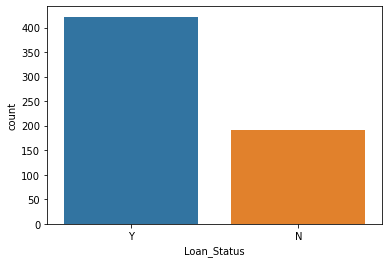

In [19]:
sns.countplot(df['Loan_Status'])

# EDA

In [20]:
dfcorr=df.corr()

<AxesSubplot:>

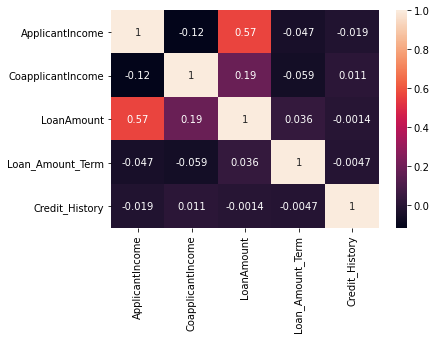

In [21]:
sns.heatmap(dfcorr,annot=True)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


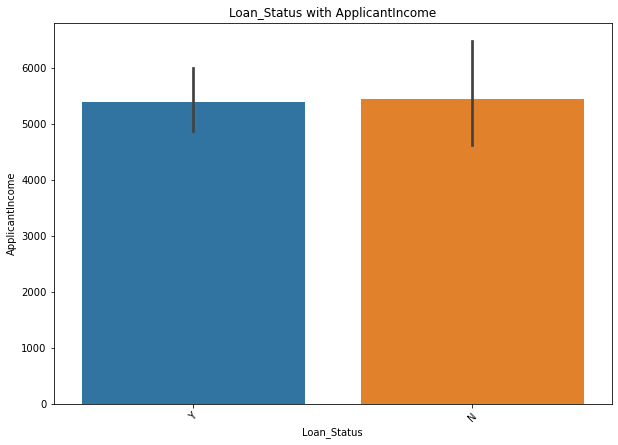

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

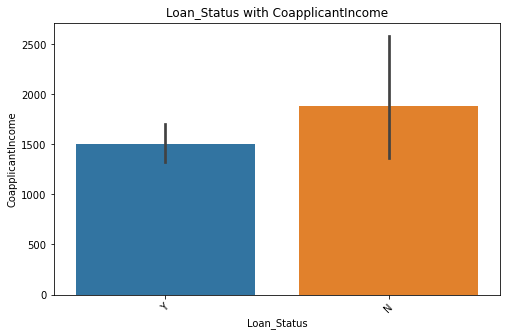

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

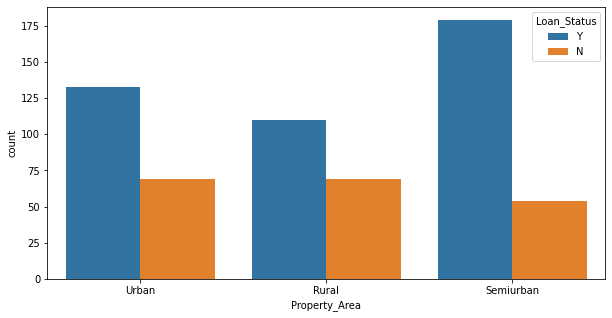

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

- People those are from Urban area having 50-50 chances of approval 
- In RuralProperty_area no approval chances are increasing 
- In Semiurban area there are high chances for approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

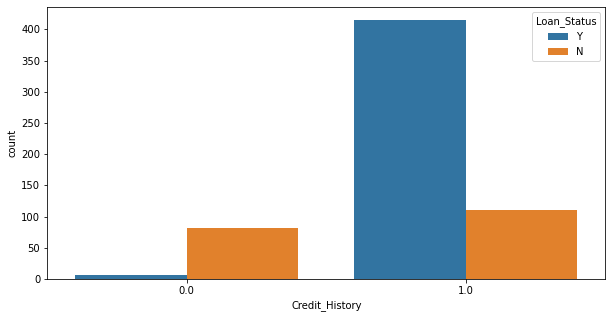

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

- Here we have the logical figure most of the people those are not getting approval are not having credit hsitory
- People those having good credit history are getting approval 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

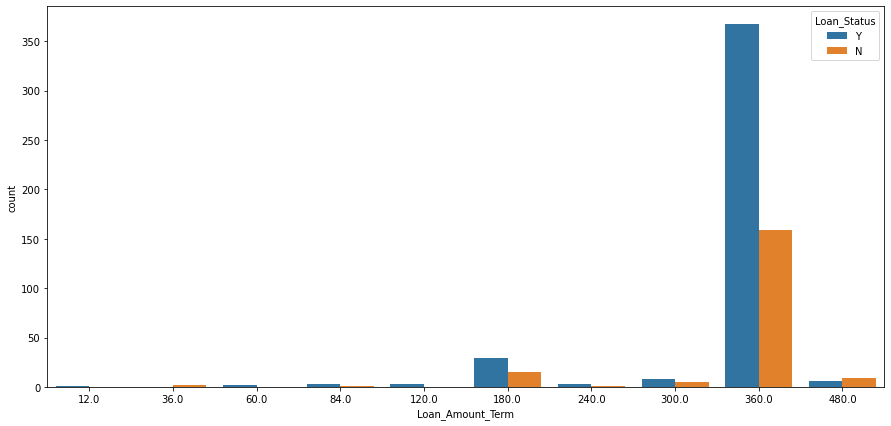

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

- Most of the people who applied for loan asked for 360 months of term  
- People who are taking loan for 480 months are not getting approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

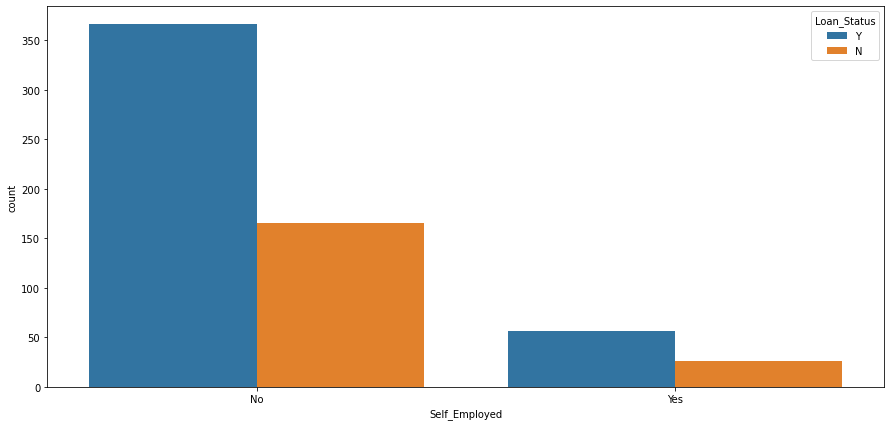

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

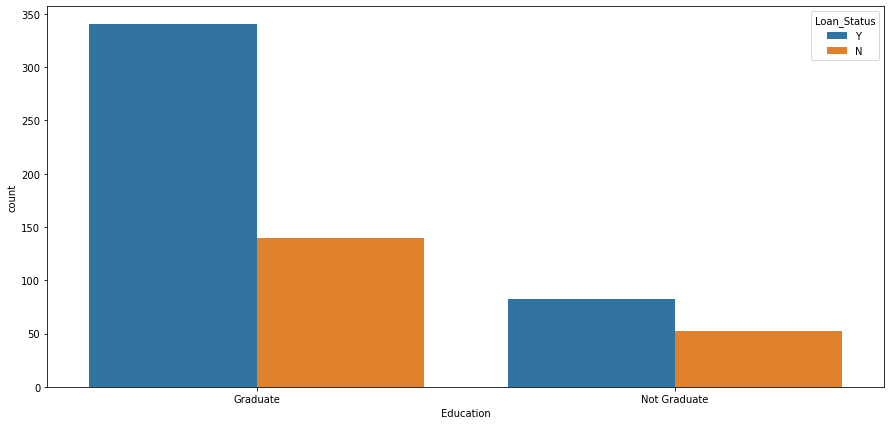

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

- There are high chances of approval for Graduate people
     - In Graduate categ. we have around 350 approved and around 150 not approved

<AxesSubplot:xlabel='Dependents', ylabel='count'>

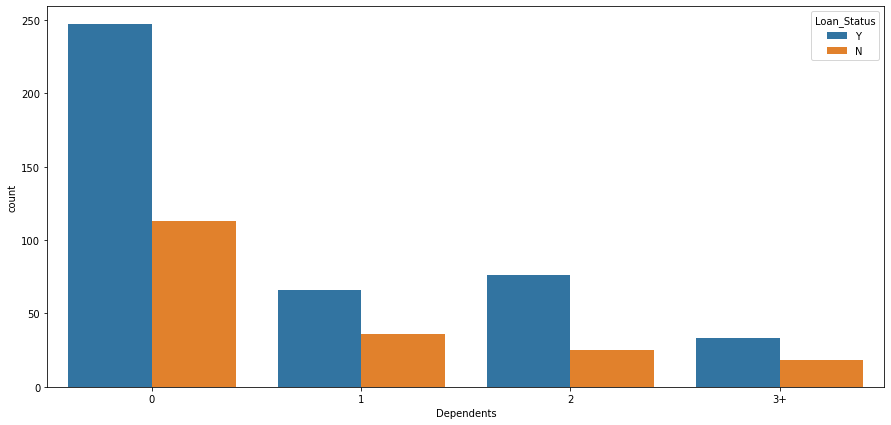

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

- We can notice people those are not having dependents are getting chances of Loan approval 
- When dependents numbers are 3+ there are less chances of approval

#### Using LabelEncoder for convering categorical to numerical

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


- All columns are converted into numerical now

# Skewness handling


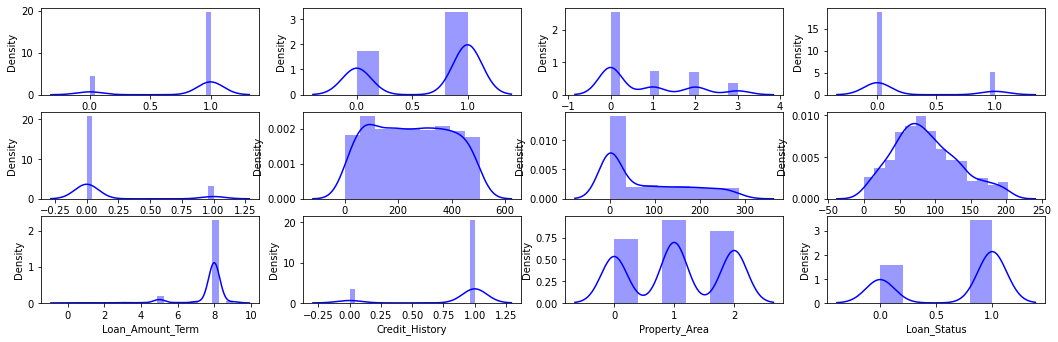

In [36]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [37]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### Skewness more than+/- 0.5 will we treated  
#### object and Target column will not be treated

In [38]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

## Outliers Handling

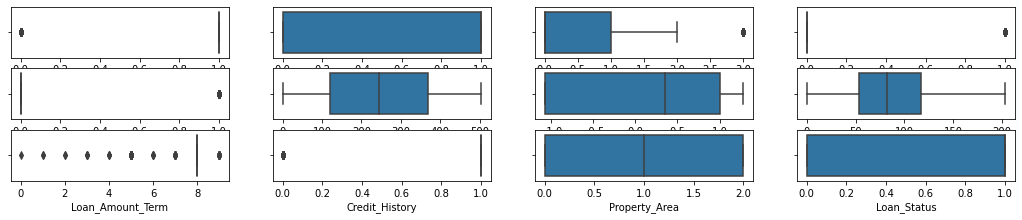

In [39]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

- Only some of columns seems having outliers after skewness removed .

# Outliers removal

In [40]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [41]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


- Zscore removing 12 rows from data

## IQR

In [42]:

from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


###  Choosing ZSCORE because there is huge dataloss in IQR

In [44]:
df=df_1

# Dividing data into X and Y

In [45]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']


In [46]:
x.shape

(602, 11)

In [47]:
y.shape

(602,)

### Scaling X values


In [48]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [49]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [50]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.817276,0.652824,0.246401,0.217608,0.131229,0.491220,0.458587,0.434700,0.692691,0.852159,0.516611
std,0.386762,0.476468,0.336385,0.412963,0.337932,0.286063,0.426122,0.224584,0.206076,0.355237,0.394078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.234623,0.000000,0.267241,0.750000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.489087,0.623274,0.408867,0.750000,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.737599,0.883545,0.576355,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalanced learn

Using OverSampling_BorderlineSMOTE
- because there is less data in Loan_Status for yes

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

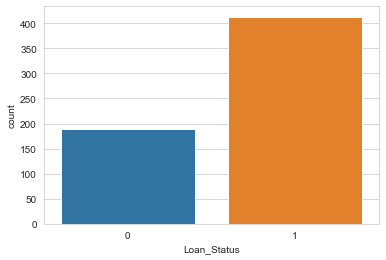

In [51]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

- We can see here Data is not fully balanced .
- we have around 200 in yes and around 400 in no. 

In [52]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (602,)
Resample Target dataset shape (826,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

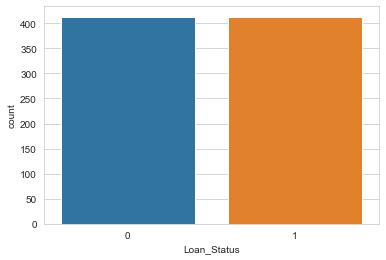

In [53]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

- Now we have balaced data for model training

## Spliting Train and Test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [56]:
x_train.shape

(602, 11)

In [57]:
x_test.shape

(224, 11)

In [58]:
y_train.shape

(602,)

In [59]:
y_test.shape

(224,)

 # MODEL BUILDING:

In [60]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [61]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.6427820372398685


In [62]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6205357142857143
[[50 52]
 [33 89]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       102
           1       0.63      0.73      0.68       122

    accuracy                           0.62       224
   macro avg       0.62      0.61      0.61       224
weighted avg       0.62      0.62      0.61       224

Training accuracy:: 0.6445182724252492
Test accuracy:: 0.6205357142857143


## DECISION TREE CLASSIFIER

In [63]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7397444322745528


In [64]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7589285714285714
[[76 26]
 [28 94]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       102
           1       0.78      0.77      0.78       122

    accuracy                           0.76       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.76      0.76      0.76       224

Training accuracy:: 1.0
Test accuracy:: 0.7589285714285714


## KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.7300255567725447


In [66]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7053571428571429
[[84 18]
 [48 74]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       102
           1       0.80      0.61      0.69       122

    accuracy                           0.71       224
   macro avg       0.72      0.72      0.70       224
weighted avg       0.73      0.71      0.70       224

Training accuracy:: 0.8488372093023255
Test accuracy:: 0.7053571428571429


## RandomForestClassifier

In [67]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8293464768163563


In [68]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8348214285714286
[[ 84  18]
 [ 19 103]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       102
           1       0.85      0.84      0.85       122

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224

Training accuracy:: 1.0
Test accuracy:: 0.8348214285714286


# ENSEMBLE TECHNIQUES

## 1.ADA BOOST CLASSIFIER

In [69]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.749544519541581


In [70]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


0.7321428571428571
[[72 30]
 [30 92]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       102
           1       0.75      0.75      0.75       122

    accuracy                           0.73       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.73      0.73      0.73       224

Training accuracy:: 0.7956810631229236
Test accuracy:: 0.7321428571428571


## 2.BAGGING CLASSIFIER


In [71]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.7978989127240671


In [72]:

bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8080357142857143
[[87 15]
 [28 94]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       102
           1       0.86      0.77      0.81       122

    accuracy                           0.81       224
   macro avg       0.81      0.81      0.81       224
weighted avg       0.81      0.81      0.81       224

Training accuracy:: 0.9933554817275747
Test accuracy:: 0.8080357142857143


## 3.Gradient Boosting classifier


In [73]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7581104907434617


In [74]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


0.7857142857142857
[[ 76  26]
 [ 22 100]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       102
           1       0.79      0.82      0.81       122

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224

Training accuracy:: 0.8953488372093024
Test accuracy:: 0.7857142857142857


#### OBSERVATION:
    We will Choose GradientBoostingClassifier as final model for HYPER PARAMETER TUNING 

# HYPER PARAMETER TUNING:

In [75]:
grbc=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,300,50],
    'learning_rate':[0.1,0.5,1.0],
     'loss':['deviance', 'exponential']              
}

In [76]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [77]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,grbc_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


Accuracy after parameter tuning:: 0.7857142857142857


In [78]:
grbc_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 300}

#### Model training with best parameters

In [79]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['deviance'] }             

In [80]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [81]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


Accuracy after parameter tuning:: 0.78125


#### After HYPER PARAMETER TUNING models accuracy score got increased 


## Report of GradientBoostingClassifier

In [82]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       102
           1       0.79      0.81      0.80       122

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.78      0.78      0.78       224



<AxesSubplot:>

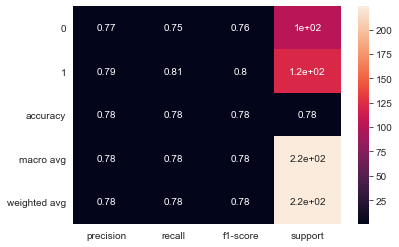

In [83]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.778286724525876


In [86]:
from sklearn.metrics import roc_curve

In [87]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

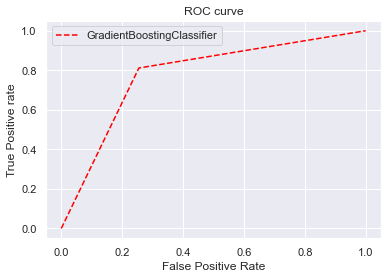

In [88]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [89]:
import joblib

In [90]:
joblib.dump(best_grbc_grid.best_estimator_,'Loan_Application_Status_Prediction.pkl')

['Loan_Application_Status_Prediction.pkl']